In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as  plt
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/advertising/advertising.csv


In [2]:
df=pd.read_csv("/kaggle/input/advertising/advertising.csv")

# Overview

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.shape

(1000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
df.describe(include='O')

,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Cloned 5thgeneration orchestration,Lisamouth,France,2016-03-27 00:53:11
freq,1,3,9,1


* Ad Topic Line are all unique so we will drop it 
* City mostly doesn't change so we will drop  it too `

In [8]:
df=df.drop(columns=['City','Ad Topic Line'],axis=1)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,Iceland,2016-06-03 03:36:18,0


In [9]:
df['Date']=pd.to_datetime(df['Timestamp'])

In [10]:
df=df.drop(columns=['Timestamp'],axis=1)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Clicked on Ad,Date
0,68.95,35,61833.90,256.09,0,Tunisia,0,2016-03-27 00:53:11
1,80.23,31,68441.85,193.77,1,Nauru,0,2016-04-04 01:39:02
2,69.47,26,59785.94,236.50,0,San Marino,0,2016-03-13 20:35:42
3,74.15,29,54806.18,245.89,1,Italy,0,2016-01-10 02:31:19
4,68.37,35,73889.99,225.58,0,Iceland,0,2016-06-03 03:36:18


In [11]:
df['Date'].min(),df['Date'].max()

(Timestamp('2016-01-01 02:52:10'), Timestamp('2016-07-24 00:22:16'))

 All  Data is in the Same Year so year is not important

In [12]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=42)

In [13]:
train.shape,test.shape

((800, 8), (200, 8))

In [14]:
train.isna().sum(),test.isna().sum()

(Daily Time Spent on Site    0
 Age                         0
 Area Income                 0
 Daily Internet Usage        0
 Male                        0
 Country                     0
 Clicked on Ad               0
 Date                        0
 dtype: int64,
 Daily Time Spent on Site    0
 Age                         0
 Area Income                 0
 Daily Internet Usage        0
 Male                        0
 Country                     0
 Clicked on Ad               0
 Date                        0
 dtype: int64)

In [15]:
train['hour']=train['Date'].dt.hour
train['month']=train['Date'].dt.month
test['hour']=test['Date'].dt.hour
test['month']=test['Date'].dt.month
train=train.drop(columns=['Date'],axis=1)
test=test.drop(columns=['Date'],axis=1)

# Data Visualization

Text(0.5, 1.0, 'Clicked on Ad vs month ')

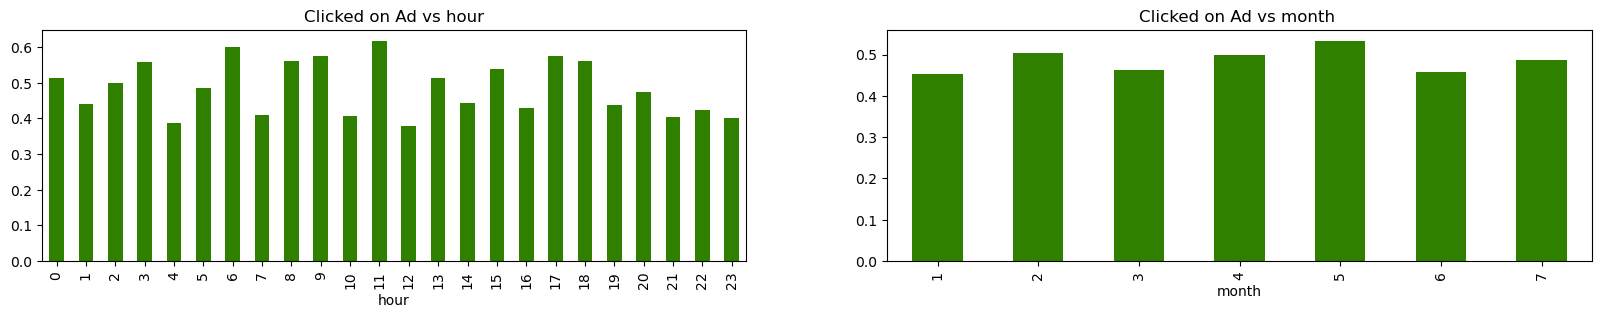

In [16]:
fig,ax=plt.subplots(1,2,figsize=(20,3))
train.groupby(['hour'])['Clicked on Ad'].mean().plot(kind='bar',color='#308000',ax=ax[0])
ax[0].set_title('Clicked on Ad vs hour')
train.groupby(['month'])['Clicked on Ad'].mean().plot(kind='bar',color='#308000',ax=ax[1])
ax[1].set_title('Clicked on Ad vs month ')

In [17]:
continous=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
discrete=['Clicked on Ad','Male','hour','month']

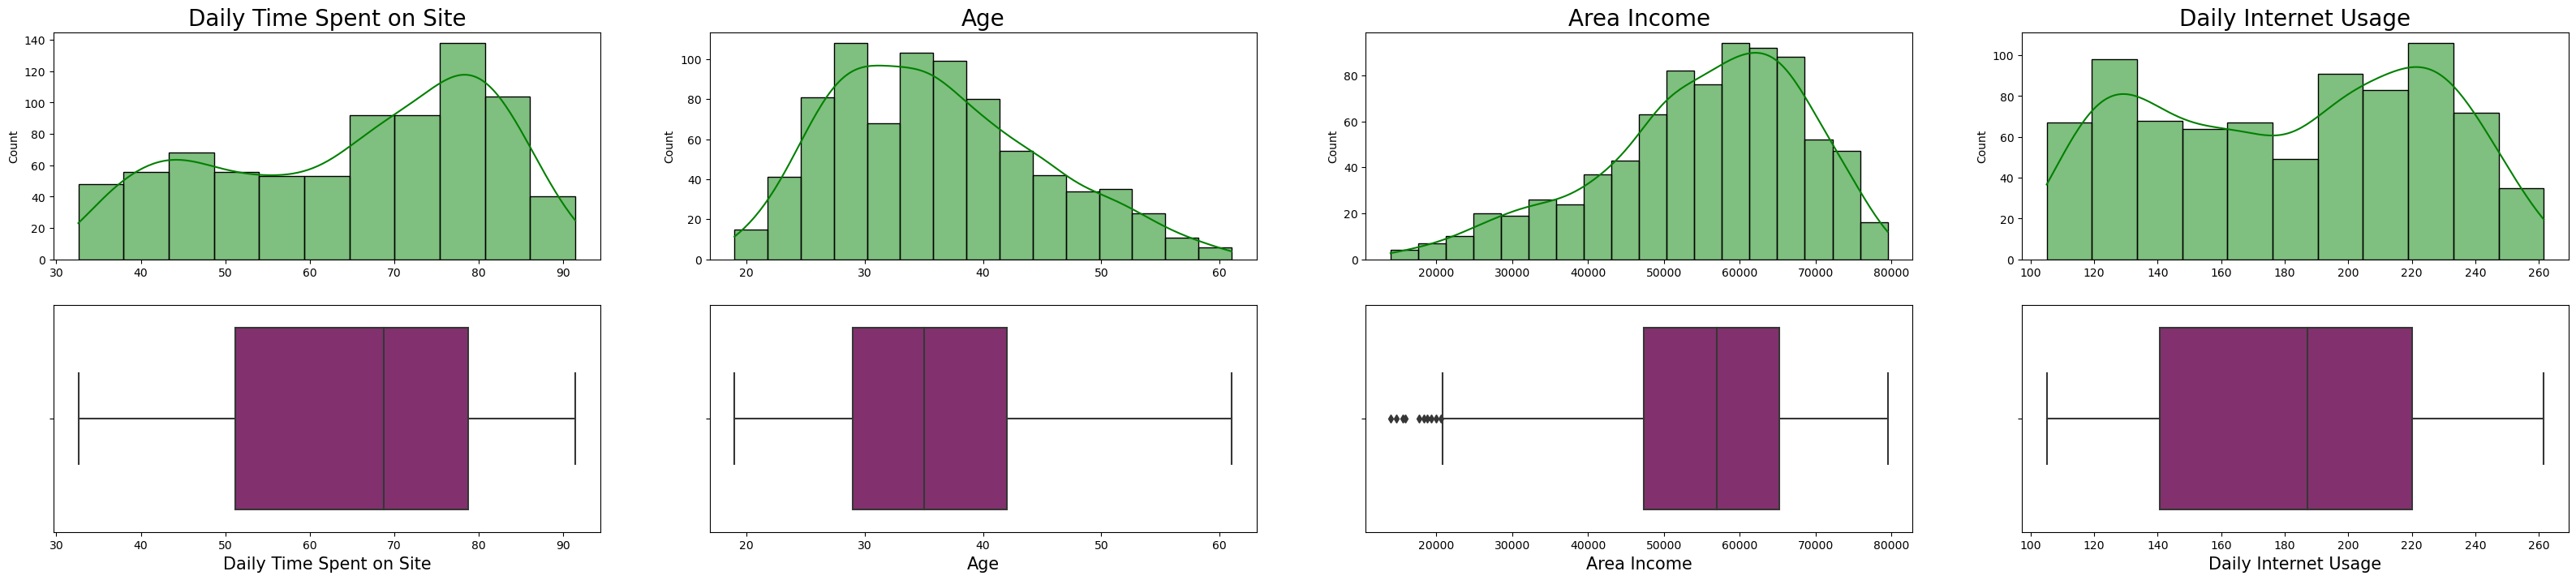

In [18]:
fig,ax=plt.subplots(2,len(continous),figsize=(40,8))
for idx,col in enumerate(continous):
    sns.histplot(data=train,x=col,ax=ax[0][idx],color='green',kde='true')
    sns.boxplot(data=train,x=col,ax=ax[1][idx],color='#902375')
    ax[0][idx].set_xlabel('')
    ax[1][idx].set_xlabel(col,fontsize=15)
    ax[0][idx].set_title(col,fontsize=20)

fig.show()

In [19]:
train=train[train['Area Income']>20000]
train.shape

(791, 9)

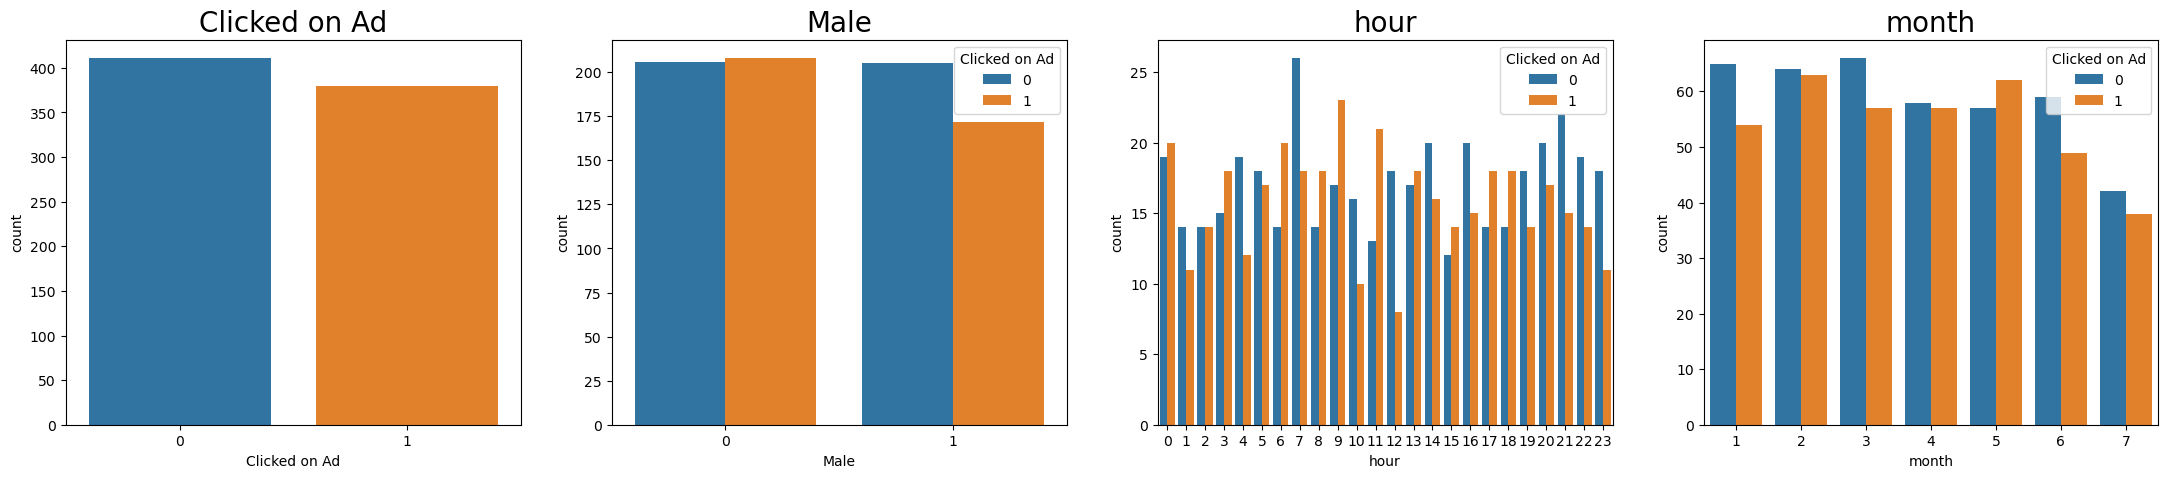

In [20]:
fig,ax=plt.subplots(1,len(discrete),figsize=(27,5))
for idx,col in enumerate(discrete):
    if idx==0:
        sns.countplot(data=train,x=col,ax=ax[idx])
    else:
        sns.countplot(data=train,x=col,ax=ax[idx],hue='Clicked on Ad')
    ax[idx].set_title(col,fontsize=20)

fig.show()

In [21]:
train.groupby('Male')['Clicked on Ad'].sum()

Male
0    208
1    172
Name: Clicked on Ad, dtype: int64

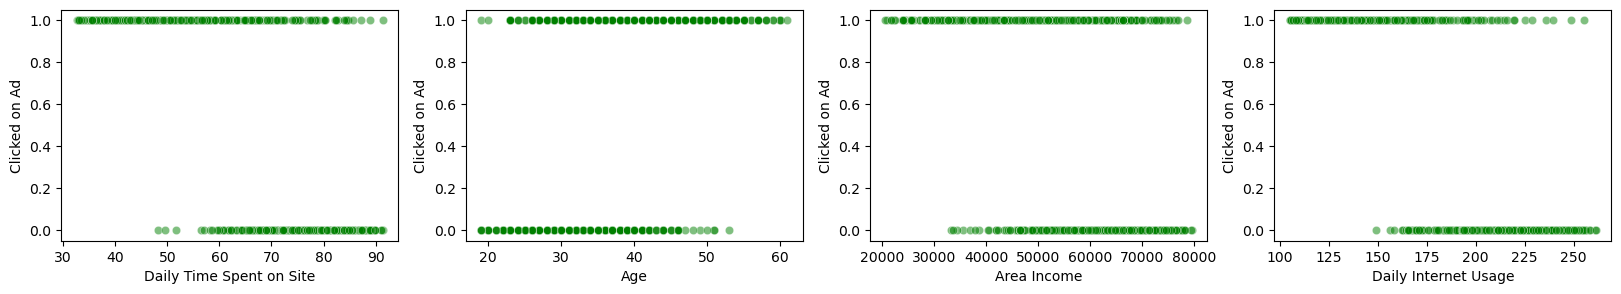

In [22]:
fig,ax=plt.subplots(1,len(continous),figsize=(20,3))
for idx,col in enumerate(continous):
    

    sns.scatterplot(data=train,x=col,y='Clicked on Ad',ax=ax[idx],alpha=0.5,color='green')
    
    

fig.show()

We will replace countries with more sample than 3 with their mean and let others to have 0.5

In [23]:

Country_freq=pd.DataFrame(train['Country'].value_counts())
Country_mean=pd.DataFrame(train.groupby('Country')['Clicked on Ad'].mean())

def getCountryMean(c):
    if c in train['Country'].unique():

        if Country_freq.loc[c,'Country']>=3:
            return Country_mean.loc[c,'Clicked on Ad']
        else:
            return 0.5
    else:
        return 0.5

    
    
train['Samples_mean_by_Country']=train['Country'].apply(getCountryMean)
test['Samples_mean_by_Country']=test['Country'].apply(getCountryMean)
train=train.drop(columns='Country',axis=1)
test=test.drop(columns='Country',axis=1)



<Axes: >

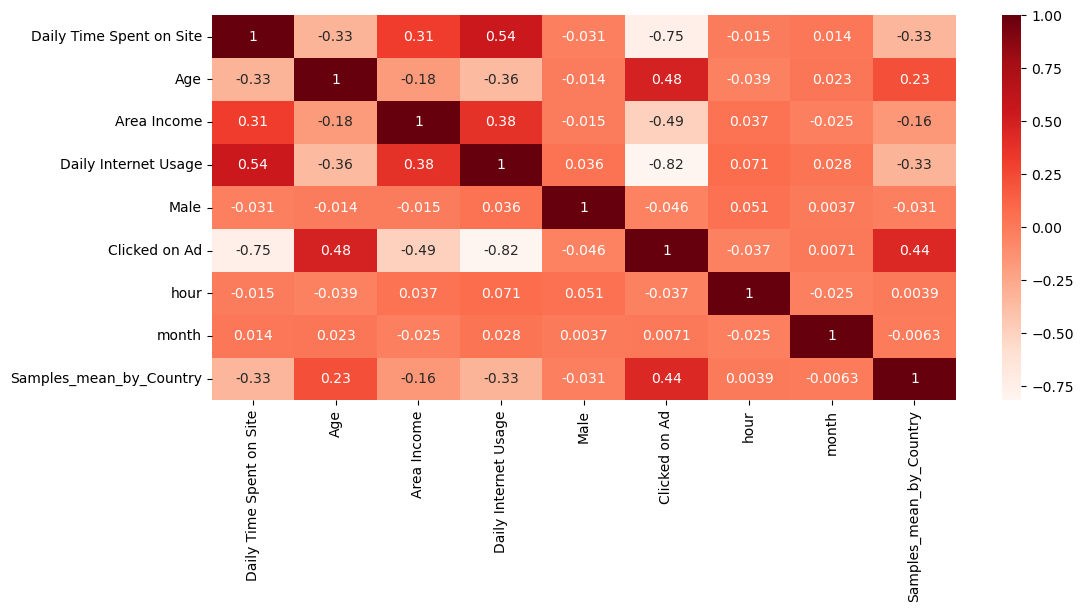

In [24]:
plt.figure(figsize=(12,5))
sns.heatmap(train.corr(),cmap='Reds',annot=True)


# Model Selection

In [25]:
train.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'hour', 'month',
       'Samples_mean_by_Country'],
      dtype='object')

In [26]:
train_X=train.drop(columns='Clicked on Ad',axis=1)
train_y=train['Clicked on Ad']
test_X=test.drop(columns='Clicked on Ad',axis=1)
test_y=test['Clicked on Ad']


In [27]:
train_X.columns,test_X.columns

(Index(['Daily Time Spent on Site', 'Age', 'Area Income',
        'Daily Internet Usage', 'Male', 'hour', 'month',
        'Samples_mean_by_Country'],
       dtype='object'),
 Index(['Daily Time Spent on Site', 'Age', 'Area Income',
        'Daily Internet Usage', 'Male', 'hour', 'month',
        'Samples_mean_by_Country'],
       dtype='object'))

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_X=scaler.fit_transform(train_X)
test_X=scaler.transform(test_X)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier , RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

def tuneModelAndGetBestparame(model,parama):
    grid=GridSearchCV(model,param_grid=parama,cv=5)
    grid.fit(train_X,train_y)
    print(f"train score :{grid.score(train_X,train_y)}")
    print(f"test score :{grid.score(test_X,test_y)}")
    print(grid.best_params_)
    return grid.best_estimator_
    
def classification_report_and_confusion_matrix(model,test_y_pred):
    print(classification_report(test_y,test_y_pred))
    sns.heatmap(confusion_matrix(test_y,test_y_pred),cmap='Reds',annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    

    

# 1- Logistic Regression

In [30]:
parama = {
    'C': [0.01,0.1, 1.0, 10.0,100.0],   # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty type
    'solver': ['liblinear', 'saga'],  # Solver algorithm
}
logReg=tuneModelAndGetBestparame(LogisticRegression(random_state=45),parama)


train score :0.9810366624525917
test score :0.94
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


              precision    recall  f1-score   support

           0       0.91      0.97      0.93        89
           1       0.97      0.92      0.94       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



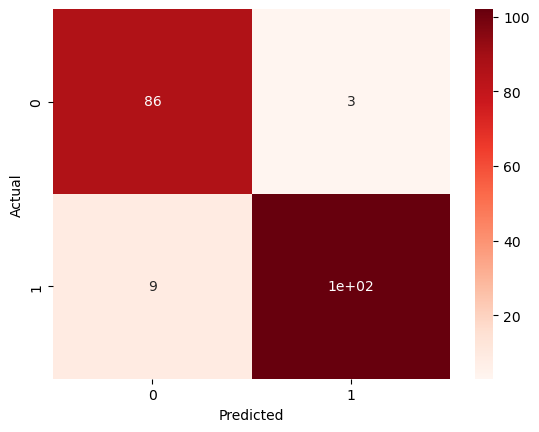

In [31]:

classification_report_and_confusion_matrix(logReg,logReg.predict(test_X))


# 2- Support Vector Classifier

train score :0.9797724399494311
test score :0.935
{'C': 0.01, 'degree': 2, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        89
           1       0.97      0.91      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



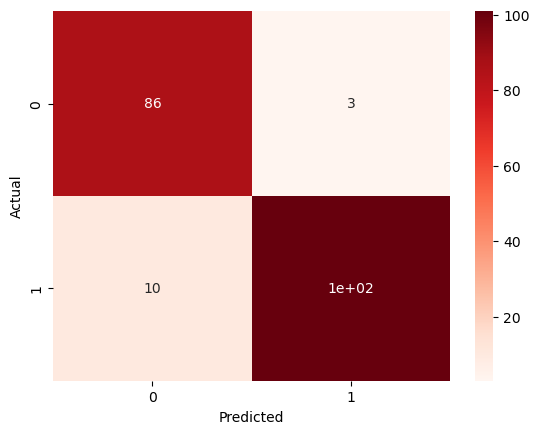

In [32]:
svc=SVC(probability=True)
param={'C':[0.01,0.1, 1.0, 10.0,100.0], 'kernel':['linear','rbf','poly'],'degree':[2,3,4,5]}

svc=tuneModelAndGetBestparame(svc,param)

classification_report_and_confusion_matrix(svc,svc.predict(test_X))

# 3- Decision Tree

train score :0.9747155499367889
test score :0.905
{'max_depth': 3, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        89
           1       0.93      0.90      0.91       111

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



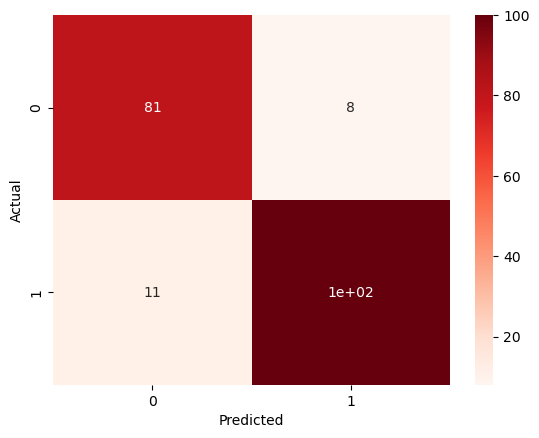

In [33]:
DT=DecisionTreeClassifier()
parama={'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15],'min_samples_split':[3,5,10,30,40,50]}
DT=tuneModelAndGetBestparame(DT,parama)
classification_report_and_confusion_matrix(DT,DT.predict(test_X))

# 4- KNN Classifier

train score :0.9747155499367889
test score :0.92
{'n_neighbors': 20}
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        89
           1       0.98      0.87      0.92       111

    accuracy                           0.92       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.92      0.92       200



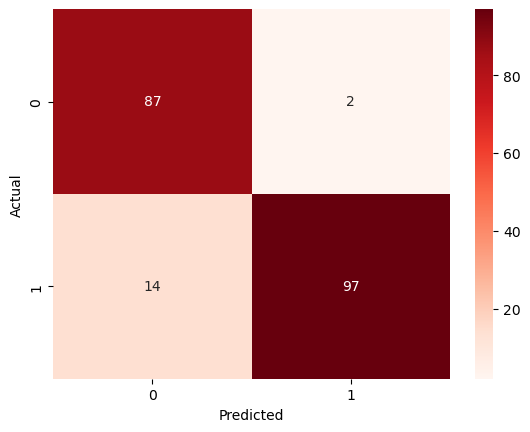

In [34]:
knn=KNeighborsClassifier()
parama={'n_neighbors':[i for i in range(1,21)]}
knn=tuneModelAndGetBestparame(knn,parama)

classification_report_and_confusion_matrix(knn,knn.predict(test_X))


# 5- Voting Classifier 

**soft voting**

In [35]:
# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=[('dt', DT), ('svc', svc), ('knn', knn),('log',logReg)], voting='soft')
voting_clf.fit(train_X,train_y)
print(f'train_score= {voting_clf.score(train_X,train_y)}')
print(f'test_score = {voting_clf.score(test_X,test_y)}')



train_score= 0.9835651074589128
test_score = 0.92


**Hard Voting**

train_score= 0.9810366624525917
test_score = 0.94
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        89
           1       0.98      0.91      0.94       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



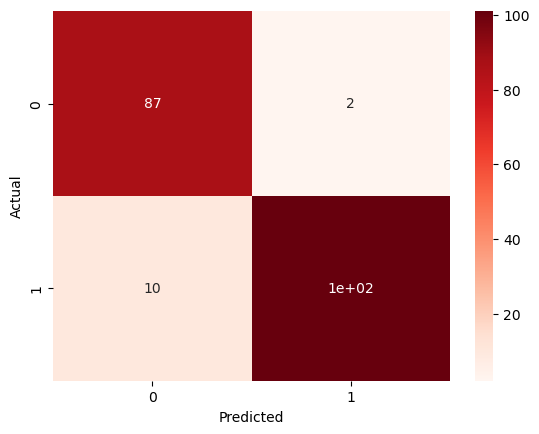

In [36]:
voting_clf = VotingClassifier(estimators=[('dt', DT), ('svc', svc), ('knn', knn),('log',logReg)], voting='hard')
voting_clf.fit(train_X,train_y)
print(f'train_score= {voting_clf.score(train_X,train_y)}')
print(f'test_score = {voting_clf.score(test_X,test_y)}')
classification_report_and_confusion_matrix(voting_clf,voting_clf.predict(test_X))


# 6- Random Forest

train_score= 1.0
test_score = 0.935
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        89
           1       0.95      0.93      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



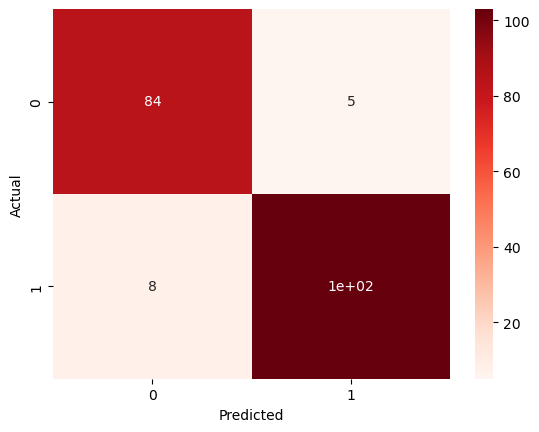

In [37]:
#
randomForest = RandomForestClassifier( n_jobs=-1, random_state=42,n_estimators=100)
randomForest.fit(train_X,train_y)
print(f'train_score= {randomForest.score(train_X,train_y)}')
print(f'test_score = {randomForest.score(test_X,test_y)}')

classification_report_and_confusion_matrix(randomForest,randomForest.predict(test_X))


# XGboost Classifer

train score :0.9709228824273072
test score :0.92
{'max_depth': 2}
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        89
           1       0.93      0.93      0.93       111

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



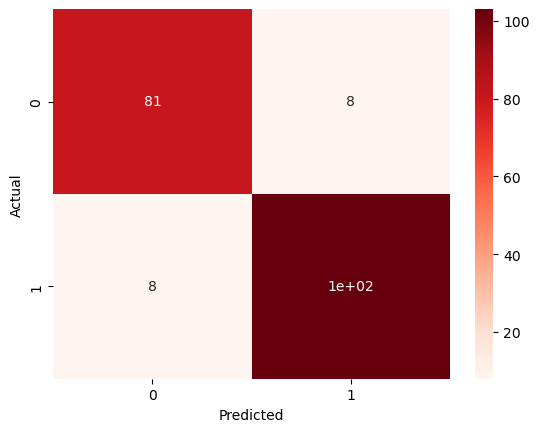

In [38]:
from xgboost import XGBClassifier
xgb = XGBClassifier( n_estimators=300, learning_rate=0.01, random_state=42)

parama={'max_depth':np.arange(2,15)}

xgb=tuneModelAndGetBestparame(xgb,parama)
classification_report_and_confusion_matrix(xgb,xgb.predict(test_X))


# Conclusion

* Logistic Regression and VotingClassifer have the best accuracy with 0.94 on test data and f1 score=0.94
* RandomForest overfits the data